In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle
import json

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projects/Mentorness/Salary Prediction/Salary Prediction of Data Professions.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.1+ KB


In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

###Data Preprocessing###
handling null values

In [ ]:
def find_null_values(df):
  null_counts = df.isnull().sum().to_dict()
  return null_counts
find_null_values(df)

{'first_name': 0,
 'last_name': 2,
 'sex': 0,
 'doj': 1,
 'current_date': 0,
 'designation': 0,
 'age': 3,
 'salary': 0,
 'unit': 0,
 'leaves_used': 3,
 'leaves_remaining': 2,
 'ratings': 2,
 'past_exp': 0}

In [ ]:
df = df.dropna(subset=['last_name','doj', 'age', 'leaves_used', 'leaves_remaining', 'ratings'])

In [ ]:
find_null_values(df)

{'first_name': 0,
 'last_name': 0,
 'sex': 0,
 'doj': 0,
 'current_date': 0,
 'designation': 0,
 'age': 0,
 'salary': 0,
 'unit': 0,
 'leaves_used': 0,
 'leaves_remaining': 0,
 'ratings': 0,
 'past_exp': 0}

Data type format

In [ ]:
df1 = df.copy()

In [ ]:
df1['doj'] = pd.to_datetime(df1['doj'])
df1['current_date'] = pd.to_datetime(df1['current_date'])

In [ ]:
df1.designation.unique()

array(['Analyst', 'Senior Analyst', 'Associate', 'Senior Manager',
       'Manager', 'Director'], dtype=object)

In [ ]:
df1.unit.unique()

array(['Finance', 'IT', 'Marketing', 'Operations', 'Web', 'Management'],
      dtype=object)

Outliers detection

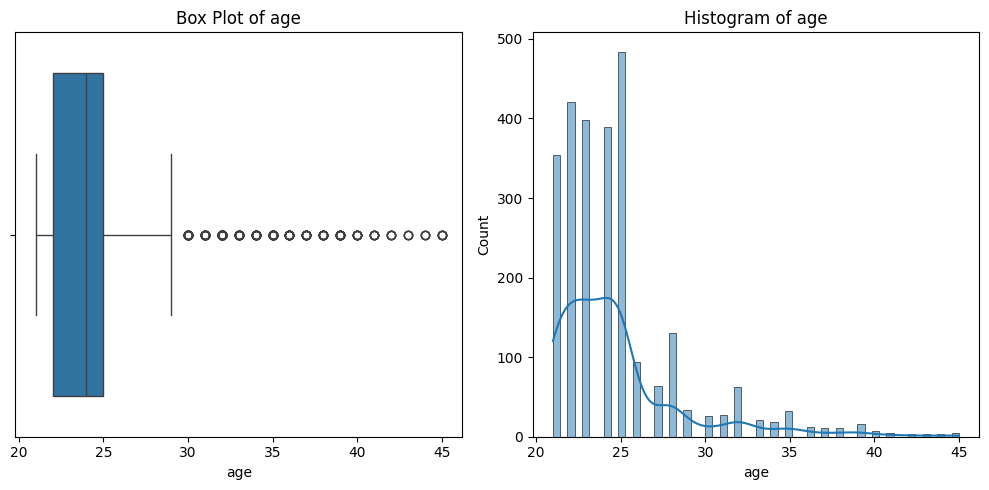

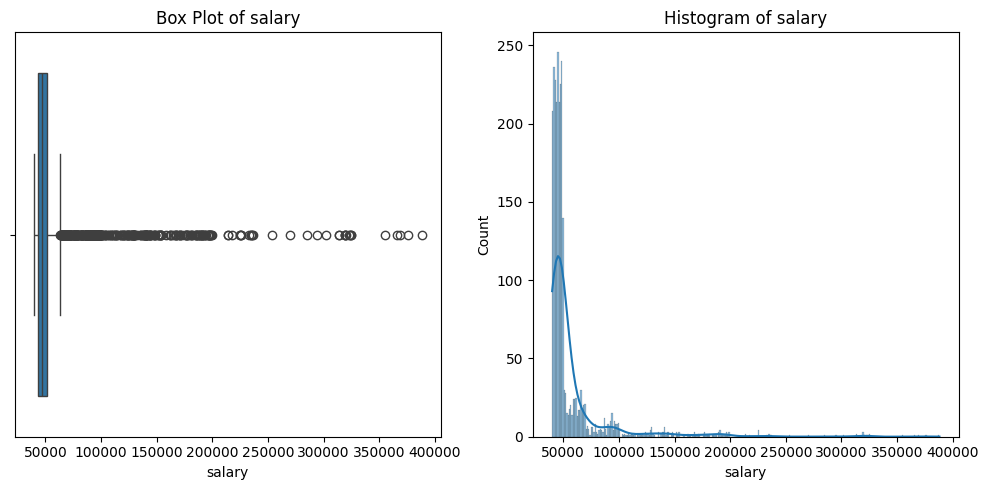

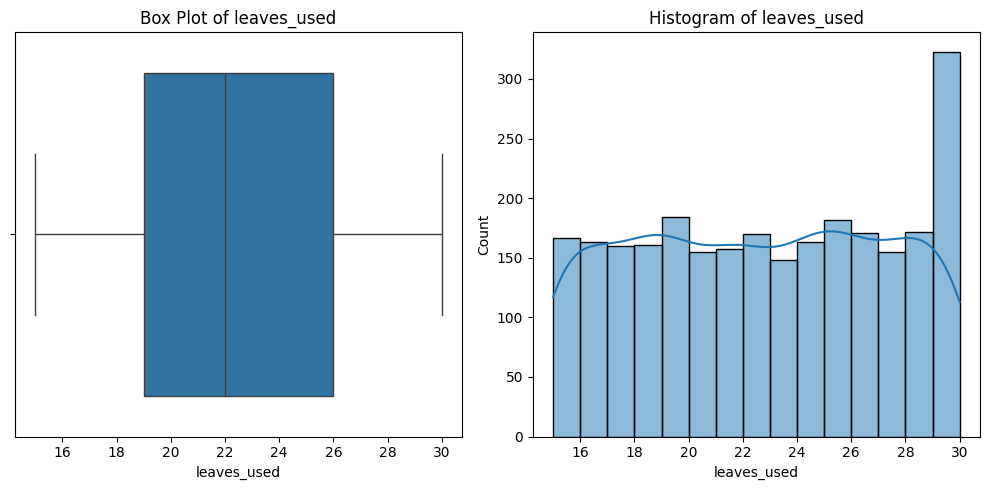

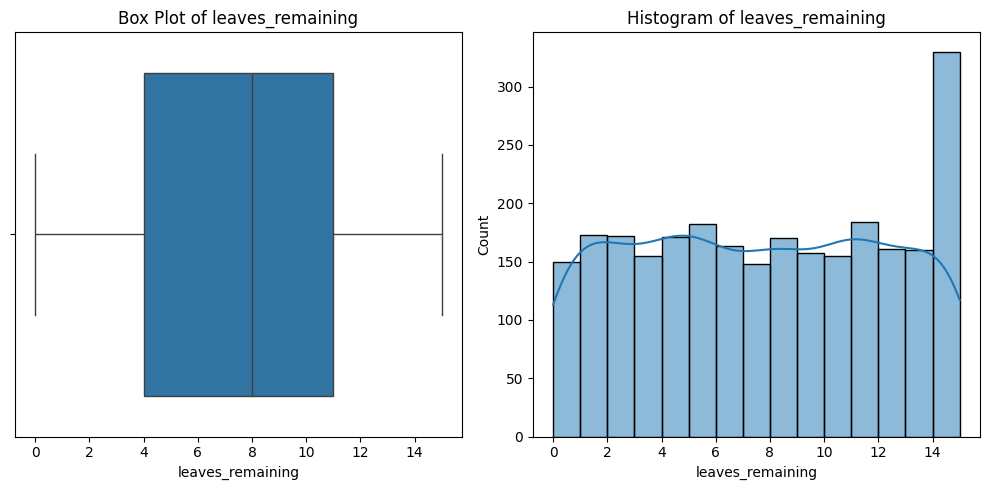

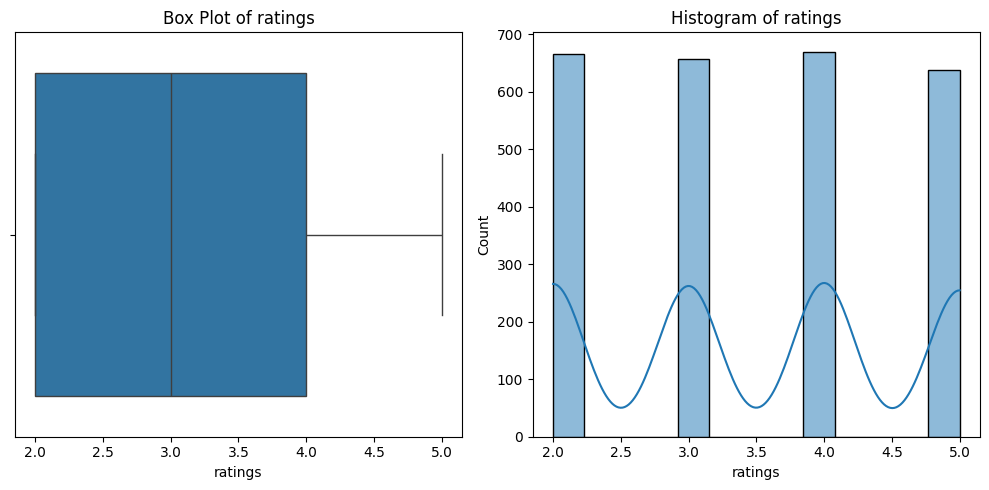

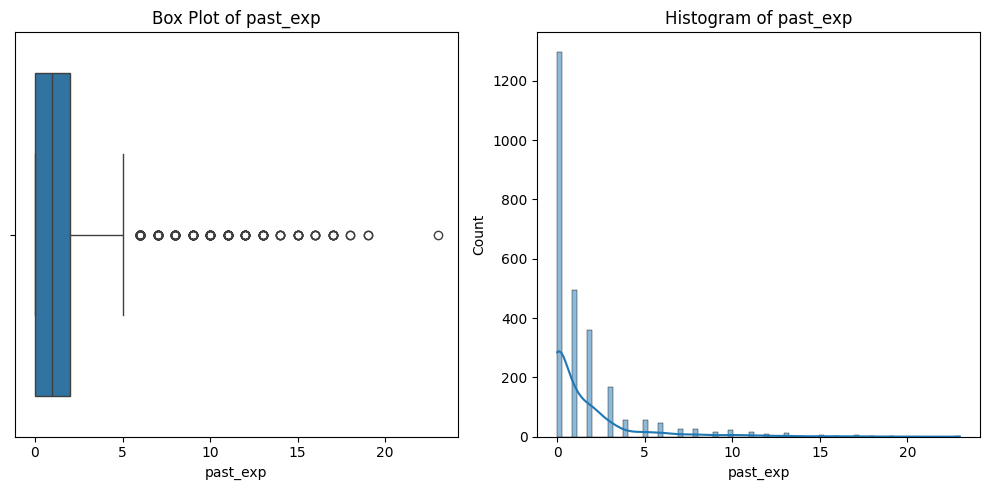

In [ ]:
numerical_columns = df1.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df1[column])
    plt.title(f'Box Plot of {column}')
    plt.subplot(1, 2, 2)
    sns.histplot(df1[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.tight_layout()
    plt.show()


In [ ]:
numerical_columns = df1.select_dtypes(include=['float64', 'int64']).columns

def find_outliers_iqr(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

def find_outliers_zscore(column, threshold=3):
    z_scores = (column - column.mean()) / column.std()
    outliers = column[abs(z_scores) > threshold]
    return outliers

outliers_iqr = {col: find_outliers_iqr(df1[col]) for col in numerical_columns}
outliers_zscore = {col: find_outliers_zscore(df1[col]) for col in numerical_columns}

print("Outliers using IQR:")
for col, outliers in outliers_iqr.items():
    print(f"{col}: {outliers.tolist()}")

print("\nOutliers using Z-score:")
for col, outliers in outliers_zscore.items():
    print(f"{col}: {outliers.tolist()}")


Outliers using IQR:
age: [39.0, 32.0, 31.0, 38.0, 31.0, 33.0, 33.0, 32.0, 38.0, 35.0, 41.0, 32.0, 42.0, 43.0, 33.0, 36.0, 43.0, 35.0, 32.0, 39.0, 34.0, 41.0, 43.0, 33.0, 33.0, 30.0, 38.0, 30.0, 35.0, 30.0, 32.0, 45.0, 30.0, 32.0, 31.0, 36.0, 33.0, 34.0, 32.0, 31.0, 34.0, 35.0, 32.0, 31.0, 35.0, 31.0, 40.0, 32.0, 31.0, 36.0, 35.0, 32.0, 34.0, 32.0, 31.0, 33.0, 37.0, 35.0, 32.0, 31.0, 32.0, 32.0, 35.0, 35.0, 33.0, 45.0, 35.0, 45.0, 35.0, 39.0, 30.0, 31.0, 31.0, 33.0, 34.0, 37.0, 31.0, 38.0, 37.0, 35.0, 30.0, 32.0, 37.0, 39.0, 30.0, 32.0, 37.0, 32.0, 32.0, 34.0, 31.0, 36.0, 31.0, 31.0, 35.0, 32.0, 32.0, 39.0, 36.0, 35.0, 35.0, 32.0, 32.0, 40.0, 36.0, 31.0, 38.0, 37.0, 32.0, 30.0, 39.0, 32.0, 34.0, 32.0, 40.0, 32.0, 32.0, 33.0, 31.0, 36.0, 30.0, 30.0, 32.0, 34.0, 30.0, 34.0, 30.0, 30.0, 35.0, 32.0, 37.0, 33.0, 32.0, 34.0, 35.0, 41.0, 44.0, 35.0, 32.0, 34.0, 35.0, 32.0, 33.0, 35.0, 39.0, 32.0, 35.0, 32.0, 38.0, 30.0, 39.0, 31.0, 30.0, 35.0, 39.0, 31.0, 34.0, 32.0, 44.0, 36.0, 30.0, 30.0, 32

Feature engineering

In [ ]:
df2 = df1.copy()

In [ ]:
columns_to_drop = ['first_name', 'last_name']
df2 = df2.drop(columns=columns_to_drop)

In [ ]:
df2['days_in_cmpny'] = (df2['current_date'] - df2['doj']).dt.days

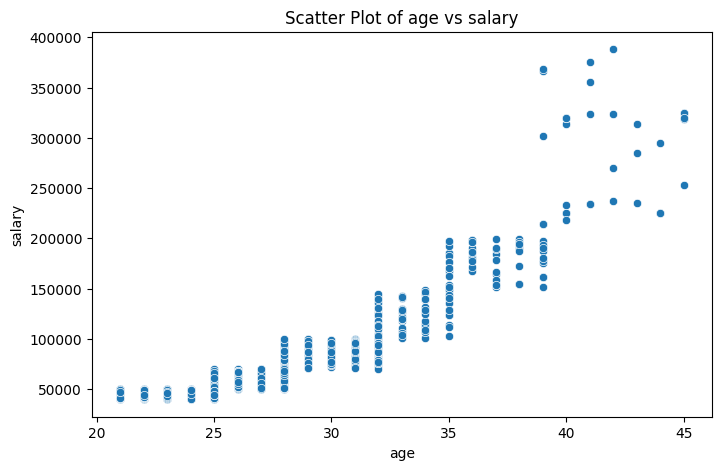

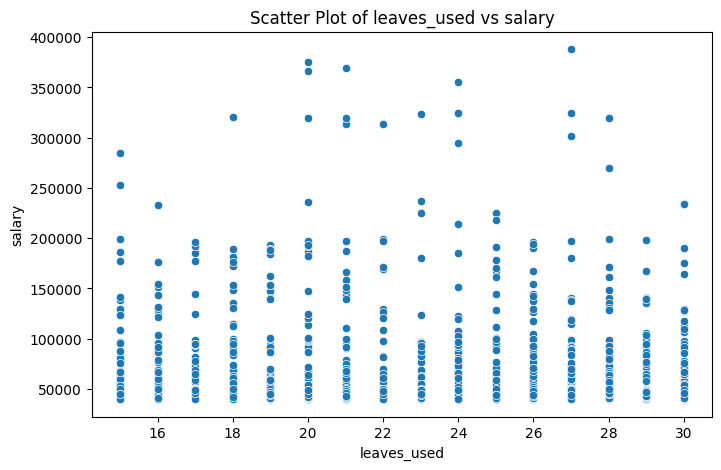

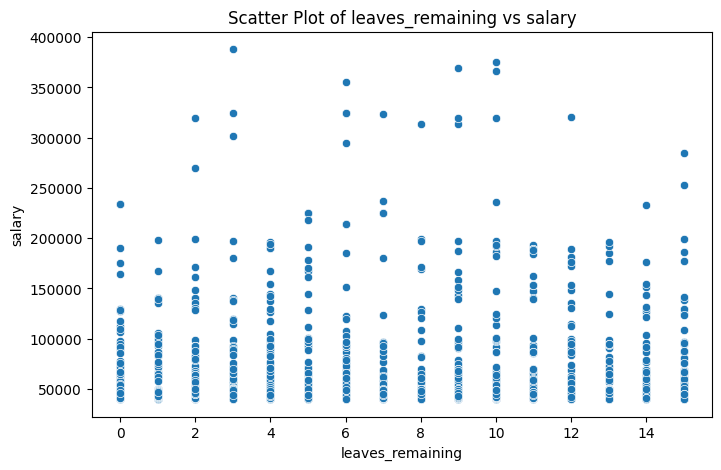

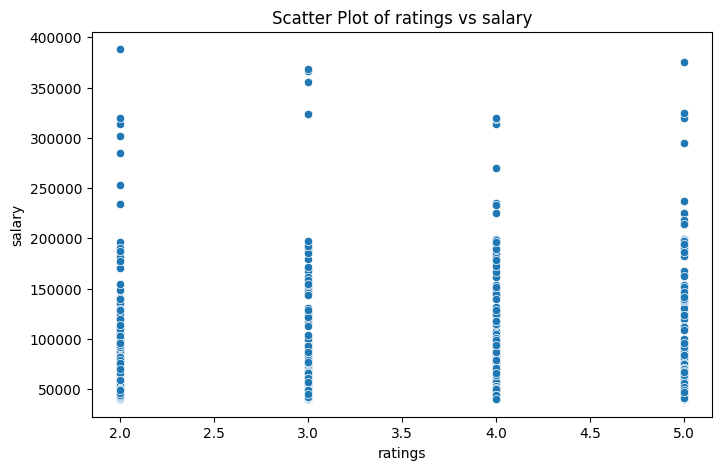

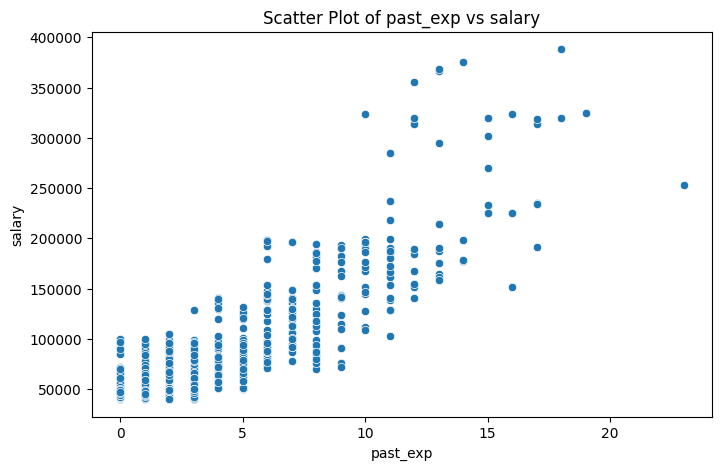

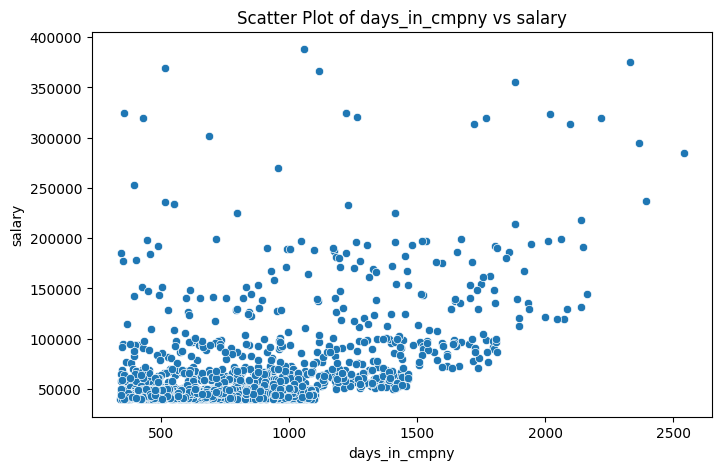

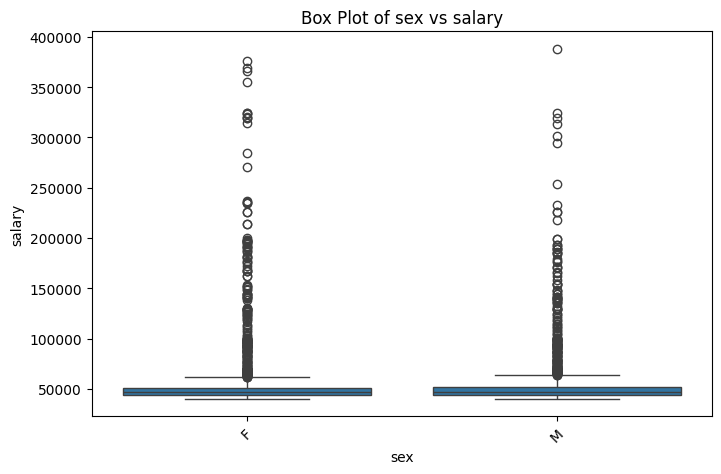

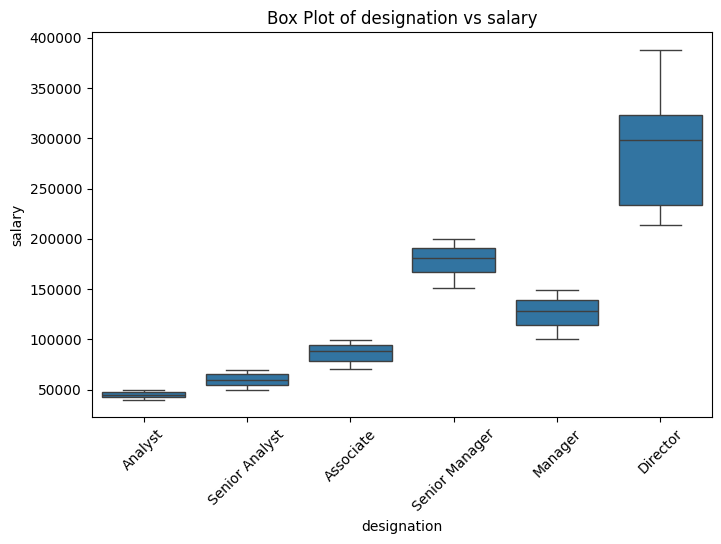

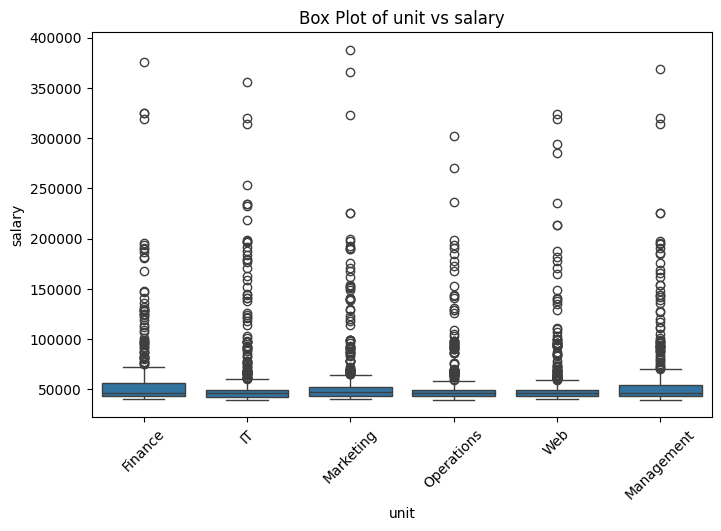

In [ ]:
numerical_columns = df2.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    if column != 'salary':
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=column, y='salary', data=df2)
        plt.title(f'Scatter Plot of {column} vs salary')
        plt.xlabel(column)
        plt.ylabel('salary')
        plt.show()


categorical_columns = df2.select_dtypes(include=['object']).columns
for column in categorical_columns:
    if column != 'name':
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=column, y='salary', data=df2)
        plt.title(f'Box Plot of {column} vs salary')
        plt.xlabel(column)
        plt.ylabel('salary')
        plt.xticks(rotation=45)
        plt.show()


In [ ]:
df3 = df2.copy()

In [ ]:
columns_to_drop = ['doj', 'current_date']
df3 = df3.drop(columns=columns_to_drop)

In [ ]:
df3['salary_age'] = df3['age'] * df3['salary']

In [ ]:
df3['salary_exp'] = df3['past_exp'] * df3['salary']

In [ ]:
df3['salary_days_cmpny'] = df3['days_in_cmpny'] * df3['salary']

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2631 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                2631 non-null   object 
 1   designation        2631 non-null   object 
 2   age                2631 non-null   float64
 3   salary             2631 non-null   int64  
 4   unit               2631 non-null   object 
 5   leaves_used        2631 non-null   float64
 6   leaves_remaining   2631 non-null   float64
 7   ratings            2631 non-null   float64
 8   past_exp           2631 non-null   int64  
 9   days_in_cmpny      2631 non-null   int64  
 10  salary_age         2631 non-null   float64
 11  salary_exp         2631 non-null   int64  
 12  salary_days_cmpny  2631 non-null   int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 287.8+ KB


Pipeline for scaling and encoding

In [ ]:
df4 = df3.copy()

In [ ]:
numeric_features = df4.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_features.remove('salary')
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [ ]:
categorical_features = df3.select_dtypes(include=['object']).columns.tolist()
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


###MODEL BUILDING, TRAINING AND EVALUATION###

splitting

In [ ]:
df5 = df4.copy()

In [ ]:


X = df5.drop(['salary'], axis=1)
y = df5['salary']

# Apply the preprocessor to transform the features
X_transformed = preprocessor.fit_transform(X)

# Split the transformed data
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)



Shape of X_train: (2104, 23)
Shape of X_test: (527, 23)
Shape of y_train: (2104,)
Shape of y_test: (527,)


In [ ]:

# Save the preprocessor (you can also save the best models)
with open('/content/drive/MyDrive/Projects/Mentorness/Salary Prediction/preprocessor.pkl', 'wb') as f:
  pickle.dump(preprocessor, f)

In [ ]:
#Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\n** Linear Regression **")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")


** Linear Regression **
Mean Absolute Error: 1007.98
Mean Squared Error: 2199214.49
R2 Score: 1.00


In [ ]:
# Decision Tree Regressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\n** Decision Tree Regressor **")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")


** Decision Tree Regressor **
Mean Absolute Error: 457.02
Mean Squared Error: 2380585.46
R2 Score: 1.00


In [ ]:
# Random Forest Regressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\n** Random Forest Regressor **")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")



** Random Forest Regressor **
Mean Absolute Error: 437.79
Mean Squared Error: 2342351.47
R2 Score: 1.00


In [ ]:
# XGBoost Regressor
model = GradientBoostingRegressor()  # XGBoost is implemented as GradientBoostingRegressor
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\n** XGBoost Regressor **")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")


** XGBoost Regressor **
Mean Absolute Error: 705.83
Mean Squared Error: 1801327.69
R2 Score: 1.00


Hyperparameter tuning

In [ ]:
#For Linear Regression
# Ridge Regression (no hyperparameter tuning needed)
model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\n** Ridge Regression **")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")


** Ridge Regression **
Mean Absolute Error: 1088.94
Mean Squared Error: 2373613.69
R2 Score: 1.00


In [ ]:
#decision tree
param_grid = {
  'max_depth': [4, 8, 12],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 5, 10]
}
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_model_dt = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Model Parameters:", best_params)
y_pred = best_model_dt.predict(X_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")


Best Model Parameters: {'max_depth': 12, 'min_samples_leaf': 5, 'min_samples_split': 2}
Mean Squared Error: 6352810.24
R2 Score: 0.99


In [ ]:
#random forest
param_grid = {
  'n_estimators': [100, 200, 300],
  'max_depth': [4, 8, 12],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 5, 10]
}


grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_model_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Model Parameters:", best_params)

y_pred = best_model_rf.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")


Best Model Parameters: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Mean Squared Error: 2376586.72
R2 Score: 1.00


In [ ]:

param_grid = {
  'learning_rate': [0.05, 0.1, 0.2],
  'n_estimators': [100, 200, 300],
  'max_depth': [4, 8, 12]
}


grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_model_gb = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Model Parameters:", best_params)

y_pred = best_model_gb.predict(X_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")


Best Model Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
Mean Squared Error: 1252146.27
R2 Score: 1.00


Saving.

In [ ]:
with open('/content/drive/MyDrive/Projects/Mentorness/Salary Prediction/model.pkl', 'wb') as f:
  pickle.dump(best_model_gb, f)

In [ ]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}

designated_path = "/content/drive/MyDrive/Projects/Mentorness/Salary Prediction/columns.json"

with open(designated_path, "w") as f:
    f.write(json.dumps(columns))